## 1. Fetch the data


In [20]:
import requests
import json
import pandas as pd
import time

key = "" 
headers = { 'apikey': key, 'Accept': 'application/json'}

with open("data/ids.txt", "r") as fp:
    ids = fp.read()
    
ids = ids.split(",")
columns = ["id", "latitude", "longitude", "city", "street", "number", "elevation"]
df = pd.DataFrame(columns=columns)

def get_location_info(id):
    url = f'https://airapi.airly.eu/v2/installations/{id}'
    r = requests.get(url, headers)
    tmp_dict = json.loads(r.content)   
    try:
        my_id = tmp_dict['id']
    except KeyError:
        print(tmp_dict)
        return None
    latitude = tmp_dict["location"]["latitude"]
    longitude = tmp_dict["location"]["longitude"]
    city = tmp_dict["address"]["city"]
    street = tmp_dict["address"]["street"]
    number = tmp_dict["address"]["number"]
    elevation = tmp_dict["elevation"]

    row = {"id": my_id, "latitude": latitude, "longitude": longitude, "city": city, "street": street,"number":number, "elevation": elevation}
    return row


for id in ids[:50]:
    row = get_location_info(id)
    if row is None:
        df = df.append(row, ignore_index=True)   
time.sleep(60) #APi limit is 50 requests per minute

for id in ids[50:100]:
    row = get_location_info(id)
    if row is not None:
        df = df.append(row, ignore_index=True)   
time.sleep(60)

for id in ids[100:150]:
    row = get_location_info(id)
    if row is not None:
        df = df.append(row, ignore_index=True)   
time.sleep(60)

for id in ids[150:200]:
    row = get_location_info(id)
    if row is not None:
        df = df.append(row, ignore_index=True)   
time.sleep(60)

for id in ids[200:]:
    row = get_location_info(id)
    if row is not None:
        df = df.append(row, ignore_index=True)   

print(df)
df.to_csv("data/locations.csv")



{'message': 'No API key found in request'}
{'message': 'No API key found in request'}
{'message': 'No API key found in request'}
{'message': 'No API key found in request'}
{'message': 'No API key found in request'}
       id   latitude  longitude             city  \
0     466  50.096969  19.914774           Kraków   
1    2903  50.094220  19.905241           Kraków   
2     192  50.065128  19.867504           Kraków   
3     263  49.999615  19.966073  Kraków-Podgórze   
4     627  49.996571  19.957157           Kraków   
5     221  50.085346  20.007551           Kraków   
6    6182  50.084966  19.877998           Kraków   
7    2098  50.102596  19.917511         Zielonki   
8    5626  49.993368  19.946925           Kraków   
9    3282  50.097127  19.992093           Kraków   
10    215  50.096693  19.993572           Kraków   
11   1070  50.002872  19.891985           Kraków   
12    234  49.998480  19.902375           Kraków   
13    182  50.020586  20.022960           Kraków   
14   

In [21]:
df

,id,latitude,longitude,city,street,number,elevation
0,466,50.096969,19.914774,Kraków,Władysława Łokietka,133A,222.22
1,2903,50.094220,19.905241,Kraków,Stelmachów,125A,224.07
2,192,50.065128,19.867504,Kraków,aleja Kasztanowa,9,225.86
3,263,49.999615,19.966073,Kraków-Podgórze,Wyżynna,32,235.34
4,627,49.996571,19.957157,Kraków,Stepowa,8,256.48
5,221,50.085346,20.007551,Kraków,Osiedle Dywizjonu 303,26,222.43
6,6182,50.084966,19.877998,Kraków,osiedle Złota Podkowa,22,230.22
7,2098,50.102596,19.917511,Zielonki,Fiołkowa,12,228.50
8,5626,49.993368,19.946925,Kraków,Myślenicka,112,253.36
9,3282,50.097127,19.992093,Kraków,Budziszyńska,44,239.07


In [24]:
df[df["city"]=="Kraków"]

,id,latitude,longitude,city,street,number,elevation
0,466,50.096969,19.914774,Kraków,Władysława Łokietka,133A,222.22
1,2903,50.094220,19.905241,Kraków,Stelmachów,125A,224.07
2,192,50.065128,19.867504,Kraków,aleja Kasztanowa,9,225.86
4,627,49.996571,19.957157,Kraków,Stepowa,8,256.48
5,221,50.085346,20.007551,Kraków,Osiedle Dywizjonu 303,26,222.43
6,6182,50.084966,19.877998,Kraków,osiedle Złota Podkowa,22,230.22
8,5626,49.993368,19.946925,Kraków,Myślenicka,112,253.36
9,3282,50.097127,19.992093,Kraków,Budziszyńska,44,239.07
10,215,50.096693,19.993572,Kraków,Korony Polskiej,13,243.15
11,1070,50.002872,19.891985,Kraków,Profesora Geremka,26,245.78


In [25]:
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
import numpy as np

## Plot points in space with triangulation

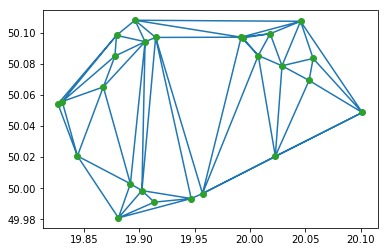

In [44]:
points = [[float(x), float(y)] for x,y in zip(list(df['longitude']), list(df['latitude']))]
points = np.array(points)
tri = Delaunay(points)


plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()